<a href="https://colab.research.google.com/github/HaswanthVIT/Vitamin_Detection/blob/main/PDF2BITS_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check for GPU Availability

In [ ]:
# Verify GPU access and display system information
import torch
import sys
import os

print("=== GPU Configuration Check ===")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"PyTorch version: {torch.__version__}")
else:
    print("❌ GPU not available. Please change runtime to GPU.")

print(f"Python version: {sys.version}")
print("✅ System configuration complete")


=== GPU Configuration Check ===
CUDA available: True
GPU device: Tesla T4
GPU memory: 15.8 GB
CUDA version: 12.4
PyTorch version: 2.6.0+cu124
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
✅ System configuration complete


Install Core Libraries and Dependencies


In [ ]:
# Install PDF processing libraries
print("📚 Installing PDF processing libraries...")
!pip install PyPDF2 pdfplumber requests beautifulsoup4 lxml

# Install additional utilities for text processing
!pip install pandas numpy matplotlib seaborn

# Verify installations
import PyPDF2
import pdfplumber
import pandas as pd
import numpy as np

print("✅ PDF processing libraries installed successfully")
print(f"PyPDF2 version: {PyPDF2.__version__}")
print("✅ Core dependencies ready")


📚 Installing PDF processing libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.5 MB/s eta 0:00:00
✅ PDF processing libraries installed successfully
PyPDF2 version: 3.0.1
✅ Core dependencies ready


Environment Configuration and Memory Optimization

In [ ]:
# Configure environment variables for optimal performance
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# Memory optimization settings
import gc
import torch

def clear_memory():
    """Clear GPU and system memory"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()

# Initial memory cleanup
clear_memory()

print("✅ Environment variables configured")
print("✅ Memory optimization settings applied")


✅ Environment variables configured
✅ Memory optimization settings applied


Step 2.2: PDF Upload Infrastructure

In [ ]:
from google.colab import files
import os
import mimetypes

def upload_pdf_file():
    """
    Upload PDF file with validation and error handling
    Returns: tuple (success: bool, file_path: str, message: str)
    """
    try:
        print("📁 Please select your PDF file to upload...")
        uploaded = files.upload()

        if not uploaded:
            return False, "", "No file was uploaded"

        # Get the uploaded file details
        file_name = list(uploaded.keys())[0]
        file_size = len(uploaded[file_name])

        # Validate file type
        if not file_name.lower().endswith('.pdf'):
            return False, "", "Please upload a PDF file only"

        # Check file size (limit to 50MB for free tier)
        if file_size > 50 * 1024 * 1024:  # 50MB limit
            return False, "", "File too large. Please upload a PDF smaller than 50MB"

        print(f"✅ File uploaded successfully: {file_name}")
        print(f"📊 File size: {file_size / 1024:.1f} KB")

        return True, file_name, "File uploaded successfully"

    except Exception as e:
        return False, "", f"Upload failed: {str(e)}"

# Execute the upload process
success, pdf_path, message = upload_pdf_file()
print(f"📋 Status: {message}")

if success:
    print(f"🎯 PDF file ready for processing: {pdf_path}")
else:
    print("❌ Please try uploading again")


📁 Please select your PDF file to upload...


Saving 1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf to 1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf
✅ File uploaded successfully: 1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf
📊 File size: 1403.6 KB
📋 Status: File uploaded successfully
🎯 PDF file ready for processing: 1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf


File Management and Preparation System

In [ ]:
import shutil
from pathlib import Path

def setup_file_management():
    """Create directory structure for file management"""

    # Create working directories
    directories = ['uploads', 'processed', 'outputs', 'checkpoints']

    for directory in directories:
        Path(directory).mkdir(exist_ok=True)
        print(f"📁 Created directory: {directory}")

    return directories

def manage_uploaded_file(file_path):
    """
    Move uploaded file to organized directory structure
    Args: file_path (str): Path to uploaded PDF file
    Returns: tuple (success: bool, new_path: str)
    """
    try:
        if not os.path.exists(file_path):
            return False, "File not found"

        # Move file to uploads directory
        new_path = f"uploads/{file_path}"
        shutil.move(file_path, new_path)

        print(f"✅ File moved to: {new_path}")
        return True, new_path

    except Exception as e:
        print(f"❌ File management error: {str(e)}")
        return False, file_path

# Set up file management system
directories = setup_file_management()

# Manage the uploaded file if upload was successful
if success:
    file_success, organized_pdf_path = manage_uploaded_file(pdf_path)
    if file_success:
        pdf_path = organized_pdf_path
        print(f"📂 PDF ready for processing at: {pdf_path}")


📁 Created directory: uploads
📁 Created directory: processed
📁 Created directory: outputs
📁 Created directory: checkpoints
✅ File moved to: uploads/1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf
📂 PDF ready for processing at: uploads/1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf


# Step 2.3: Model and Dependencies *Installation*

Install Unsloth Framework and Dependencies

In [ ]:
# Install Unsloth framework for optimized LLM training
print("🚀 Installing Unsloth framework...")
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

# Install compatible versions of key dependencies
print("📦 Installing compatible dependencies...")
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes

# Install additional training dependencies
!pip install datasets transformers tokenizers

print("✅ Unsloth framework installation complete")


🚀 Installing Unsloth framework...
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-lwzc2vu7/unsloth_14c9d16db1694090837a26c562a39ef6
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-lwzc2vu7/unsloth_14c9d16db1694090837a26c562a39ef6
  Resolved https://github.com/unslothai/unsloth.git to commit 3691534111c3ae5bea51bf4a50f47ebae1e306f0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📦 Installing compatible dependencies...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: trl
    Found existing installation: trl 0.19.0
    Uninstalling trl-0.19.0:
      Successfully uninstalled trl-0.19.0
✅ Unsloth framework installation complete


Configure Model Parameters and Settings

In [ ]:
# Model configuration parameters for Colab T4 GPU
MODEL_CONFIG = {
    # Model selection optimized for free tier
    "model_name": "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",
    "max_seq_length": 1024,  # Reduced for memory efficiency
    "dtype": None,  # Auto-detect based on GPU capabilities
    "load_in_4bit": True,  # Essential for T4 GPU compatibility

    # LoRA configuration for efficient fine-tuning
    "lora_r": 8,  # Lower rank for memory optimization
    "lora_alpha": 16,
    "lora_dropout": 0,
    "target_modules": [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj"
    ],

    # Training optimization settings
    "gradient_checkpointing": True,
    "use_8bit_optimizer": True,
    "fp16": True,
}

# Training arguments optimized for Colab environment
TRAINING_CONFIG = {
    "per_device_train_batch_size": 1,
    "gradient_accumulation_steps": 4,
    "warmup_steps": 5,
    "max_steps": 60,  # Minimal steps for prototype
    "learning_rate": 2e-4,
    "logging_steps": 10,
    "save_steps": 25,
    "save_total_limit": 2,
    "output_dir": "outputs",
    "optim": "adamw_8bit",
    "weight_decay": 0.01,
    "lr_scheduler_type": "linear",
    "dataloader_pin_memory": False,
    "remove_unused_columns": False,
}

print("✅ Model configuration parameters set")
print(f"📋 Model: {MODEL_CONFIG['model_name']}")
print(f"🧠 Max sequence length: {MODEL_CONFIG['max_seq_length']}")
print(f"🔧 LoRA rank: {MODEL_CONFIG['lora_r']}")
print(f"📊 Training steps: {TRAINING_CONFIG['max_steps']}")


✅ Model configuration parameters set
📋 Model: unsloth/Llama-3.2-3B-Instruct-bnb-4bit
🧠 Max sequence length: 1024
🔧 LoRA rank: 8
📊 Training steps: 60


Verify Installation and Prepare for Model Loading


In [ ]:
# Test Unsloth import and functionality
try:
    from unsloth import FastLanguageModel
    print("✅ Unsloth framework imported successfully")

    # Test other critical imports
    from transformers import TrainingArguments
    from trl import SFTTrainer
    from datasets import Dataset
    import json

    print("✅ All training dependencies imported successfully")

except ImportError as e:
    print(f"❌ Import error: {str(e)}")
    print("Please restart runtime and try installation again")

# Mount Google Drive for model persistence
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive mounted for checkpoint persistence")

    # Create checkpoint directory in Drive
    checkpoint_dir = '/content/drive/MyDrive/pdf2bits_checkpoints'
    os.makedirs(checkpoint_dir, exist_ok=True)
    print(f"📁 Checkpoint directory ready: {checkpoint_dir}")

except Exception as e:
    print(f"⚠️ Drive mount warning: {str(e)}")
    print("Checkpoints will be saved locally only")

# Final memory cleanup and GPU verification
clear_memory()

if torch.cuda.is_available():
    print(f"✅ Final GPU check: {torch.cuda.get_device_name(0)}")
    print(f"💾 Available GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    print("🚀 Environment ready for model training!")
else:
    print("❌ GPU not available - please check runtime settings")

print("\n" + "="*50)
print("📋 PHASE 2 SETUP COMPLETE")
print("✅ GPU Configuration: Ready")
print("✅ PDF Upload Infrastructure: Ready")
print("✅ Model Dependencies: Installed")
print("🎯 Ready to proceed to Phase 3: PDF Processing and Model Training")
print("="*50)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.3.0+cu121 with CUDA 1201 (you have 2.6.0+cu124)
    Python  3.11.9 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!
✅ Unsloth framework imported successfully
✅ All training dependencies imported successfully
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted for checkpoint persistence
📁 Checkpoint directory ready: /content/drive/MyDrive/pdf2bits_checkpoints
✅ Final GPU check: Tesla T4
💾 Available GPU memory: 15.8 GB
🚀 Environment ready for model training!

📋 PHASE 2 SETUP COMPLETE
✅ GPU Configuration: Ready
✅ PDF Upload Infrastructure: Ready
✅ Model Dependencies: Installed
🎯 Ready to proceed to Phase 3: PDF Processing and Model Training


# Step 3.1: PDF Text Extraction Pipeline

Robust Multi-Method PDF Text Extraction System


In [ ]:
import PyPDF2
import pdfplumber
import re
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

class RobustPDFExtractor:
    """
    Advanced PDF text extraction with multiple methods and comprehensive error handling
    """

    def __init__(self):
        self.extraction_methods = ['pdfplumber', 'pypdf2']
        self.extraction_stats = {}
        print("🔧 PDF Extractor initialized with dual-method support")

    def extract_with_pdfplumber(self, pdf_path):
        """Primary extraction method using pdfplumber for enhanced accuracy"""
        try:
            text_content = []
            with pdfplumber.open(pdf_path) as pdf:
                total_pages = len(pdf.pages)
                print(f"📖 Processing {total_pages} pages with pdfplumber...")

                for page_num, page in enumerate(pdf.pages):
                    page_text = page.extract_text()
                    if page_text and len(page_text.strip()) > 50:  # Filter minimal content pages
                        text_content.append({
                            'page': page_num + 1,
                            'text': page_text,
                            'word_count': len(page_text.split()),
                            'char_count': len(page_text)
                        })

                    # Progress indicator for large documents
                    if (page_num + 1) % 10 == 0:
                        print(f"   Processed {page_num + 1}/{total_pages} pages...")

            return {
                'success': True,
                'method': 'pdfplumber',
                'pages': text_content,
                'total_pages': len(text_content),
                'total_words': sum(p['word_count'] for p in text_content)
            }
        except Exception as e:
            return {
                'success': False,
                'method': 'pdfplumber',
                'error': str(e)
            }

    def extract_with_pypdf2(self, pdf_path):
        """Fallback extraction method using PyPDF2 for compatibility"""
        try:
            text_content = []
            with open(pdf_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                total_pages = len(reader.pages)
                print(f"📄 Processing {total_pages} pages with PyPDF2...")

                for page_num, page in enumerate(reader.pages):
                    page_text = page.extract_text()
                    if page_text and len(page_text.strip()) > 50:
                        text_content.append({
                            'page': page_num + 1,
                            'text': page_text,
                            'word_count': len(page_text.split()),
                            'char_count': len(page_text)
                        })

            return {
                'success': True,
                'method': 'pypdf2',
                'pages': text_content,
                'total_pages': len(text_content),
                'total_words': sum(p['word_count'] for p in text_content)
            }
        except Exception as e:
            return {
                'success': False,
                'method': 'pypdf2',
                'error': str(e)
            }

    def extract_text(self, pdf_path):
        """
        Intelligent extraction with automatic method selection and fallback
        """
        print(f"🚀 Starting intelligent PDF text extraction: {pdf_path}")

        # Verify file existence
        if not Path(pdf_path).exists():
            return {
                'success': False,
                'error': f"File not found: {pdf_path}"
            }

        # Primary extraction attempt with pdfplumber
        result = self.extract_with_pdfplumber(pdf_path)

        if result['success'] and result['total_words'] > 100:
            print(f"✅ Successfully extracted using {result['method']}")
            print(f"📊 Statistics: {result['total_pages']} pages, {result['total_words']} words")
            return result
        else:
            if not result['success']:
                print(f"⚠️ pdfplumber failed: {result['error']}")
            else:
                print(f"⚠️ pdfplumber extracted minimal content ({result['total_words']} words)")

            print("🔄 Attempting PyPDF2 fallback extraction...")

            # Fallback to PyPDF2
            result = self.extract_with_pypdf2(pdf_path)

            if result['success']:
                print(f"✅ Successfully extracted using {result['method']}")
                print(f"📊 Statistics: {result['total_pages']} pages, {result['total_words']} words")
                return result
            else:
                print(f"❌ All extraction methods failed: {result['error']}")
                return result

# Initialize PDF extractor
pdf_extractor = RobustPDFExtractor()

# Verify uploaded PDF and extract content
if 'pdf_path' in locals() and pdf_path:
    extraction_result = pdf_extractor.extract_text(pdf_path)

    if extraction_result['success']:
        print("🎯 PDF text extraction completed successfully!")
        raw_pages = extraction_result['pages']
        extraction_stats = {
            'method_used': extraction_result['method'],
            'total_pages': extraction_result['total_pages'],
            'total_words': extraction_result['total_words']
        }
    else:
        print("❌ PDF extraction failed. Please verify your PDF file and try again.")
        raw_pages = []
else:
    print("⚠️ No PDF file detected. Please upload PDF in previous phase.")
    raw_pages = []


🔧 PDF Extractor initialized with dual-method support
🚀 Starting intelligent PDF text extraction: uploads/1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf
📖 Processing 22 pages with pdfplumber...
   Processed 10/22 pages...
   Processed 20/22 pages...
✅ Successfully extracted using pdfplumber
📊 Statistics: 22 pages, 2428 words
🎯 PDF text extraction completed successfully!


Advanced Text Cleaning and Educational Content Processing


In [ ]:
import string
import re
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

class FixedEducationalTextProcessor:
    """
    Enhanced text processor that properly handles software engineering and other educational content
    """

    def __init__(self):
        # EXPANDED educational keywords for better recognition
        self.educational_keywords = {
            # Core educational terms
            'process', 'system', 'function', 'structure', 'method', 'principle',
            'theory', 'concept', 'relationship', 'interaction', 'mechanism',
            'characteristic', 'property', 'feature', 'component', 'element',

            # Software Engineering specific terms
            'software', 'engineering', 'development', 'application', 'systematic',
            'disciplined', 'approach', 'methodology', 'framework', 'activities',
            'waterfall', 'sequential', 'linear', 'iterative', 'requirements',
            'analysis', 'design', 'implementation', 'testing', 'deployment',
            'maintenance', 'model', 'lifecycle', 'specification', 'documentation',
            'integration', 'quality', 'assurance', 'configuration', 'project',
            'planning', 'tracking', 'control', 'management', 'risk', 'measurement',

            # General academic action words
            'define', 'explain', 'describe', 'analyze', 'compare', 'contrast',
            'cause', 'effect', 'result', 'outcome', 'impact', 'influence',
            'create', 'build', 'establish', 'ensure', 'provide', 'include',
            'involve', 'require', 'achieve', 'accomplish', 'perform', 'conduct'
        }

        # MORE CONSERVATIVE PDF artifact removal (less aggressive)
        self.pdf_artifacts = [
            r'Page \d+\s*$',  # Only page numbers at end of line
            r'Chapter \d+\s*$',  # Only chapter numbers at end of line
            r'Section \d+\.\d+\s*$',  # Only section numbers at end of line
            r'Figure \d+[:\.].*',  # Figure captions
            r'Table \d+[:\.].*',  # Table captions
            r'www\.[\w\.-]+\.[\w]{2,4}',  # URLs
            r'http[s]?://[\w\.-/]+',  # HTTP URLs
            r'@[\w\.-]+\.[\w]{2,4}',  # Email addresses
            r'ISBN[\s\-]*\d+',  # ISBN numbers
        ]

        print("📝 Enhanced Educational text processor initialized")

    def clean_text_comprehensive(self, text, debug=False):
        """IMPROVED comprehensive text cleaning with debugging"""
        if not text or len(text.strip()) < 20:
            return ""

        original_length = len(text)
        if debug:
            print(f"🔍 Debug - Original text length: {original_length}")
            print(f"🔍 Debug - Sample: {text[:150]}...")

        # GENTLER PDF artifact removal
        for i, pattern in enumerate(self.pdf_artifacts):
            before_length = len(text)
            text = re.sub(pattern, '', text, flags=re.IGNORECASE | re.MULTILINE)
            removed = before_length - len(text)
            if debug and removed > 0:
                print(f"🔍 Debug - Pattern {i+1} removed {removed} characters")

        # Normalize whitespace but preserve structure
        text = re.sub(r' +', ' ', text)  # Multiple spaces to single
        text = re.sub(r'\n\n+', '\n\n', text)  # Multiple newlines to double
        text = re.sub(r'[\r\f\v]', ' ', text)  # Remove form feeds

        # GENTLER OCR correction (less aggressive)
        text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)  # CamelCase spacing
        text = re.sub(r'(\w)([.!?])([A-Z])', r'\1\2 \3', text)  # Sentence spacing

        # Clean punctuation but preserve educational content
        text = re.sub(r'[^\w\s.,!?;:()\-"\'–—]', '', text)  # Keep educational punctuation
        text = re.sub(r'([.!?]){2,}', r'\1', text)  # Remove repeated punctuation
        text = re.sub(r'\s+([,.!?;:])', r'\1', text)  # Fix punctuation spacing

        # RELAXED line filtering (was the main problem!)
        lines = text.split('\n')
        cleaned_lines = []

        for line in lines:
            line = line.strip()
            # MUCH more permissive criteria
            if (len(line) >= 3 and  # Reduced from 10 to 3!
                len(line) <= 500 and
                not line.lower().startswith(('page ', 'chapter ', 'section ', 'figure ', 'table ')) and
                not re.match(r'^\d+\s*$', line)):  # Skip lone numbers
                cleaned_lines.append(line)

        cleaned_text = ' '.join(cleaned_lines).strip()

        if debug:
            print(f"🔍 Debug - Final text length: {len(cleaned_text)}")
            print(f"🔍 Debug - Lines kept: {len(cleaned_lines)}/{len(lines)}")

        print(f"🧹 Text cleaned: {original_length} → {len(cleaned_text)} characters")
        return cleaned_text

    def _is_educational_sentence(self, sentence):
        """IMPROVED educational sentence detection"""
        words = sentence.split()
        if len(words) < 5 or len(words) > 60:  # More permissive word count
            return False

        sentence_lower = sentence.lower()

        # Check for educational keywords (primary method)
        has_educational_keywords = any(
            keyword in sentence_lower for keyword in self.educational_keywords
        )

        # Check for academic language patterns (secondary method)
        academic_indicators = [
            'is defined as', 'can be described', 'is the process', 'refers to',
            'involves', 'includes', 'consists of', 'comprises', 'encompasses',
            'is used', 'is applied', 'is implemented', 'is based on',
            'results in', 'leads to', 'causes', 'produces', 'creates'
        ]
        has_academic_patterns = any(indicator in sentence_lower for indicator in academic_indicators)

        # Check for definitional language (tertiary method)
        definitional_words = ['is', 'are', 'means', 'represents', 'defines', 'describes']
        starts_definitional = any(sentence_lower.startswith(word + ' ') or
                                ' ' + word + ' ' in sentence_lower[:50]
                                for word in definitional_words)

        # Avoid metadata and references
        avoid_patterns = ['prepared by', 'page', 'chapter', 'section', 'figure', 'table']
        is_metadata = any(pattern in sentence_lower[:30] for pattern in avoid_patterns)

        # More lenient acceptance criteria
        is_educational = (has_educational_keywords or
                         has_academic_patterns or
                         starts_definitional) and not is_metadata

        return is_educational

    def _calculate_educational_score(self, text):
        """Enhanced educational scoring"""
        words = text.lower().split()
        if not words:
            return 0

        # Educational keyword density (weighted more heavily)
        keyword_count = sum(1 for word in words if word in self.educational_keywords)
        keyword_density = keyword_count / len(words)

        # Educational phrase patterns
        educational_phrases = [
            'is defined as', 'can be described as', 'is the process',
            'results in', 'leads to', 'causes', 'due to', 'because of',
            'consists of', 'composed of', 'made up of', 'contains',
            'involves', 'includes', 'encompasses', 'comprises'
        ]
        phrase_count = sum(1 for phrase in educational_phrases if phrase in text.lower())

        # Combine metrics with improved weighting
        base_score = (keyword_density * 0.6) + (phrase_count * 0.4)

        # Bonus for multiple educational indicators
        if keyword_count >= 2:
            base_score += 0.1
        if phrase_count >= 1:
            base_score += 0.1

        return min(base_score, 1.0)  # Cap at 1.0

    def extract_educational_sentences(self, text):
        """Enhanced sentence extraction with better splitting"""
        # Improved sentence splitting
        sentences = re.split(r'[.!?]+\s+', text)
        educational_sentences = []

        for sentence in sentences:
            sentence = sentence.strip()

            # More permissive filtering
            if self._is_educational_sentence(sentence):
                educational_sentences.append({
                    'text': sentence,
                    'word_count': len(sentence.split()),
                    'educational_score': self._calculate_educational_score(sentence),
                    'complexity_score': self._calculate_complexity_score(sentence)
                })

        # Sort by educational value
        educational_sentences.sort(key=lambda x: x['educational_score'], reverse=True)

        return educational_sentences

    def _calculate_complexity_score(self, text):
        """Unchanged complexity calculation"""
        words = text.split()
        if not words:
            return 0

        avg_word_length = sum(len(word) for word in words) / len(words)
        length_score = max(0, 1 - abs(avg_word_length - 5.5) / 5.5)

        sentence_length = len(words)
        optimal_length = 20
        length_deviation = abs(sentence_length - optimal_length) / optimal_length
        sentence_score = max(0, 1 - length_deviation)

        return (length_score + sentence_score) / 2

    def create_educational_chunks(self, text, target_chunk_size=300, overlap_size=40):
        """IMPROVED chunking with more permissive criteria"""
        educational_sentences = self.extract_educational_sentences(text)

        if not educational_sentences:
            # Fallback: if no sentences detected, create basic chunks
            words = text.split()
            if len(words) >= 50:  # Minimum viable content
                return [{
                    'text': text,
                    'word_count': len(words),
                    'sentence_count': 1,
                    'educational_score': 0.3,  # Minimum score for fallback
                    'avg_complexity': 0.5
                }]
            return []

        chunks = []
        current_chunk_sentences = []
        current_word_count = 0

        for sentence_data in educational_sentences:
            sentence = sentence_data['text']
            word_count = sentence_data['word_count']

            if current_word_count + word_count <= target_chunk_size:
                current_chunk_sentences.append(sentence_data)
                current_word_count += word_count
            else:
                # LOWERED minimum chunk size from 100 to 50
                if current_chunk_sentences and current_word_count >= 50:
                    chunk_text = '. '.join([s['text'] for s in current_chunk_sentences])
                    chunk_score = sum(s['educational_score'] for s in current_chunk_sentences) / len(current_chunk_sentences)

                    chunks.append({
                        'text': chunk_text + '.',
                        'word_count': current_word_count,
                        'sentence_count': len(current_chunk_sentences),
                        'educational_score': chunk_score,
                        'avg_complexity': sum(s['complexity_score'] for s in current_chunk_sentences) / len(current_chunk_sentences)
                    })

                # Start new chunk with overlap
                overlap_sentences = current_chunk_sentences[-2:] if len(current_chunk_sentences) >= 2 else []
                current_chunk_sentences = overlap_sentences + [sentence_data]
                current_word_count = sum(s['word_count'] for s in current_chunk_sentences)

        # Add final chunk with lower threshold
        if current_chunk_sentences and current_word_count >= 30:
            chunk_text = '. '.join([s['text'] for s in current_chunk_sentences])
            chunk_score = sum(s['educational_score'] for s in current_chunk_sentences) / len(current_chunk_sentences)

            chunks.append({
                'text': chunk_text + '.',
                'word_count': current_word_count,
                'sentence_count': len(current_chunk_sentences),
                'educational_score': chunk_score,
                'avg_complexity': sum(s['complexity_score'] for s in current_chunk_sentences) / len(current_chunk_sentences)
            })

        # Sort chunks by educational value
        chunks.sort(key=lambda x: x['educational_score'], reverse=True)

        return chunks

    def process_pdf_pages(self, pages_data, debug=False):
        """Enhanced PDF processing with debugging"""
        if not pages_data:
            print("❌ No PDF pages to process")
            return []

        print(f"📚 Processing {len(pages_data)} pages for educational content...")

        all_processed_chunks = []
        total_chunks = 0

        for page_info in pages_data:
            print(f"📄 Processing page {page_info['page']} ({page_info['word_count']} words)...")

            # Clean the page text with optional debugging
            cleaned_text = self.clean_text_comprehensive(page_info['text'], debug=debug)

            # MUCH more permissive criteria for processing
            if cleaned_text and len(cleaned_text.split()) >= 20:  # Reduced from 50 to 20
                # Create educational chunks
                page_chunks = self.create_educational_chunks(cleaned_text)

                # Add metadata to chunks
                for i, chunk in enumerate(page_chunks):
                    chunk.update({
                        'source_page': page_info['page'],
                        'chunk_id': i + 1,
                        'chunk_global_id': total_chunks + i + 1
                    })
                    all_processed_chunks.append(chunk)

                total_chunks += len(page_chunks)
                print(f"   ✅ Generated {len(page_chunks)} chunks from page {page_info['page']}")
            else:
                if debug:
                    print(f"   🔍 Debug - Page {page_info['page']} cleaned text: '{cleaned_text[:100]}...'")
                print(f"   ⚠️ Page {page_info['page']} skipped (insufficient content after cleaning)")

        print(f"\n🎯 Processing Summary:")
        print(f"   Total pages processed: {len(pages_data)}")
        print(f"   Total educational chunks: {len(all_processed_chunks)}")

        if all_processed_chunks:
            avg_score = sum(chunk['educational_score'] for chunk in all_processed_chunks) / len(all_processed_chunks)
            avg_words = sum(chunk['word_count'] for chunk in all_processed_chunks) / len(all_processed_chunks)
            print(f"   Average educational score: {avg_score:.3f}")
            print(f"   Average words per chunk: {avg_words:.1f}")

        return all_processed_chunks

# USAGE: Replace your existing processor with this enhanced version
print("🔧 Creating enhanced text processor...")
text_processor = FixedEducationalTextProcessor()

# Process extracted PDF pages with debugging enabled
if 'raw_pages' in locals() and raw_pages:
    print("\n🔍 Starting enhanced text processing with debugging...")
    processed_chunks = text_processor.process_pdf_pages(raw_pages, debug=True)

    if processed_chunks:
        # Create summary DataFrame for analysis
        df_chunks = pd.DataFrame(processed_chunks)

        print(f"\n📊 Educational Content Analysis:")
        print(f"✅ Successfully processed: {len(processed_chunks)} educational chunks")
        print(f"📈 Educational score range: {df_chunks['educational_score'].min():.3f} - {df_chunks['educational_score'].max():.3f}")
        print(f"📝 Word count range: {df_chunks['word_count'].min()} - {df_chunks['word_count'].max()} words")

        # Display top educational chunks
        print(f"\n🏆 Top 3 Educational Chunks:")
        for i, chunk in enumerate(df_chunks.head(3).to_dict('records')):
            print(f"\nChunk #{chunk['chunk_global_id']} (Page {chunk['source_page']}, Score: {chunk['educational_score']:.3f}):")
            print(f"📝 {chunk['text'][:200]}...")
            print(f"📊 {chunk['word_count']} words, {chunk['sentence_count']} sentences")
    else:
        print("❌ Still no educational content chunks generated. Check raw_pages data.")
        print("🔍 Debug: First few pages content:")
        for i, page in enumerate(raw_pages[:3]):
            print(f"Page {page['page']}: '{page['text'][:100]}...'")
else:
    print("⚠️ No PDF content available (raw_pages not found). Please complete PDF extraction first.")

🔧 Creating enhanced text processor...
📝 Enhanced Educational text processor initialized

🔍 Starting enhanced text processing with debugging...
📚 Processing 22 pages for educational content...
📄 Processing page 1 (137 words)...
🔍 Debug - Original text length: 931
🔍 Debug - Sample: Software Engineering
• Software :
– The software is a collection of integrated programs.
– Computer programs and related documentation such as require...
🔍 Debug - Final text length: 924
🔍 Debug - Lines kept: 21/21
🧹 Text cleaned: 931 → 924 characters
   ✅ Generated 1 chunks from page 1
📄 Processing page 2 (97 words)...
🔍 Debug - Original text length: 582
🔍 Debug - Sample: Building software ready for 21st century demands requires accepting certain
fundamental truths. To construct software that meets modern complexities,
...
🔍 Debug - Final text length: 576
🔍 Debug - Lines kept: 12/13
🧹 Text cleaned: 582 → 576 characters
   ✅ Generated 1 chunks from page 2
📄 Processing page 3 (138 words)...
🔍 Debug - Original t

# Step 3.2: Fine-tuning Execution with Dataset Upload

Validation

In [ ]:
# from typing import Any, List, Dict, Optional, Tuple
# import json
# import os

# def validate_json_structure(data: Any) -> Tuple[bool, str]:
#     if not isinstance(data, list):
#         return False, "Dataset must be a JSON array (list) of objects."
#     if len(data) == 0:
#         return False, "Dataset is empty."
#     for i, item in enumerate(data):
#         if not isinstance(item, dict):
#             return False, f"Item at index {i} is not an object/dictionary."
#         if "text" not in item:
#             return False, f"Item at index {i} does not contain required 'text' field."
#         if not isinstance(item["text"], str) or not item["text"].strip():
#             return False, f"'text' field at index {i} must be a non-empty string."
#     return True, "Dataset is valid."

# def convert_common_formats(data: Any) -> Optional[List[Dict]]:
#     if isinstance(data, dict):
#         for key, value in data.items():
#             if isinstance(value, list):
#                 converted = []
#                 for item in value:
#                     if isinstance(item, dict):
#                         if "prompt" in item and "completion" in item:
#                             text = f"Question: {item['prompt']}\nAnswer: {item['completion']}"
#                             converted.append({"text": text})
#                         elif "input" in item and "output" in item:
#                             text = f"Input: {item['input']}\nOutput: {item['output']}"
#                             converted.append({"text": text})
#                         elif "text" in item:
#                             converted.append(item)
#                         else:
#                             converted.append({"text": str(item)})
#                     else:
#                         converted.append({"text": str(item)})
#                 return converted
#         if all(isinstance(v, str) for v in data.values()):
#             return [{"text": f"{k}: {v}"} for k, v in data.items()]
#         return [{"text": str(data)}]
#     elif isinstance(data, list):
#         if all(isinstance(item, dict) and "prompt" in item and "completion" in item for item in data):
#             return [{"text": f"Question: {item['prompt']}\nAnswer: {item['completion']}"} for item in data]
#         if all(isinstance(item, dict) and "input" in item and "output" in item for item in data):
#             return [{"text": f"Input: {item['input']}\nOutput: {item['output']}"} for item in data]
#         return data
#     else:
#         return [{"text": str(data)}]

# def load_and_validate_dataset(file_path: str) -> Tuple[Optional[List[Dict]], str]:
#     if not os.path.exists(file_path):
#         return None, f"File '{file_path}' does not exist."
#     try:
#         with open(file_path, 'r', encoding='utf-8') as f:
#             raw_data = json.load(f)
#     except json.JSONDecodeError as e:
#         return None, f"JSON parsing error: {str(e)}"
#     except Exception as e:
#         return None, f"Error reading file: {str(e)}"

#     converted_data = convert_common_formats(raw_data)

#     valid, message = validate_json_structure(converted_data)
#     if not valid:
#         return None, message
#     return converted_data, "Dataset loaded and validated successfully."

# def analyze_dataset(data: List[Dict]) -> Dict:
#     total_examples = len(data)
#     text_lengths = [len(item["text"]) for item in data]
#     word_counts = [len(item["text"].split()) for item in data]
#     empty_texts = sum(1 for item in data if not item["text"].strip())

#     analysis = {
#         "total_examples": total_examples,
#         "min_text_length": min(text_lengths) if text_lengths else 0,
#         "max_text_length": max(text_lengths) if text_lengths else 0,
#         "avg_text_length": sum(text_lengths) / total_examples if total_examples > 0 else 0,
#         "min_word_count": min(word_counts) if word_counts else 0,
#         "max_word_count": max(word_counts) if word_counts else 0,
#         "avg_word_count": sum(word_counts) / total_examples if total_examples > 0 else 0,
#         "empty_texts": empty_texts
#     }
#     return analysis

# def generate_fallback_dataset(num_examples: int = 25) -> List[Dict]:
#     return [{"text": f"Sample training example {i+1}."} for i in range(num_examples)]

# def dataset_upload_and_configuration(file_path: str):
#     dataset, message = load_and_validate_dataset(file_path)
#     if dataset is None:
#         print(f"Dataset upload failed: {message}")
#         print("Using fallback dataset for demonstration...")
#         dataset = generate_fallback_dataset()
#     else:
#         print(message)

#     analysis = analyze_dataset(dataset)
#     print("Dataset Analysis:")
#     for k, v in analysis.items():
#         print(f"- {k}: {v}")

#     return dataset

# # Example usage:
# # dataset_upload_and_configuration('pdf2bits_training_dataset.json')


# Step 3.2: Fine-tuning Execution with Dataset Upload

Dataset Upload and Model Configuration

In [ ]:
from google.colab import files
from unsloth import FastLanguageModel
import torch
from datasets import Dataset
from trl import SFTTrainer
from transformers import TrainingArguments
import json
import gc
from datetime import datetime
import os

# Memory optimization function
def optimize_memory():
    """Comprehensive memory optimization for Colab environment"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        allocated = torch.cuda.memory_allocated(0) / 1e9
        reserved = torch.cuda.memory_reserved(0) / 1e9
        print(f"💾 Memory optimized - Allocated: {allocated:.2f}GB, Reserved: {reserved:.2f}GB")
    else:
        print("💾 System memory optimized")

# Dataset upload and validation
def upload_and_validate_dataset():
    """Upload and validate training dataset with comprehensive error checking"""
    print("📤 Please upload your training dataset JSON file...")

    try:
        uploaded = files.upload()

        if not uploaded:
            print("❌ No file uploaded. Please try again.")
            return None, None

        dataset_filename = list(uploaded.keys())[0]
        print(f"📁 Uploaded file: {dataset_filename}")

        # Validate file extension
        if not dataset_filename.lower().endswith('.json'):
            print("⚠️ Warning: File does not have .json extension")

        # Load and validate dataset content
        with open(dataset_filename, 'r', encoding='utf-8') as f:
            dataset_content = json.load(f)

        # Validate dataset structure
        if not isinstance(dataset_content, list):
            print("❌ Dataset must be a list of training examples")
            return None, None

        if len(dataset_content) == 0:
            print("❌ Dataset is empty")
            return None, None

        # Validate first few examples
        required_fields = ['text']  # For instruction-following format
        sample_size = min(3, len(dataset_content))

        for i in range(sample_size):
            example = dataset_content[i]
            if not isinstance(example, dict):
                print(f"❌ Example {i+1} is not a dictionary")
                return None, None

            for field in required_fields:
                if field not in example:
                    print(f"❌ Example {i+1} missing required field: {field}")
                    return None, None

        # Dataset statistics
        total_examples = len(dataset_content)
        avg_text_length = sum(len(ex.get('text', '')) for ex in dataset_content) / total_examples

        print(f"✅ Dataset validation successful!")
        print(f"📊 Total examples: {total_examples}")
        print(f"📝 Average text length: {avg_text_length:.0f} characters")
        print(f"📋 Sample example preview:")
        print(f"   {dataset_content[0]['text'][:150]}...")

        return dataset_filename, dataset_content

    except json.JSONDecodeError as e:
        print(f"❌ JSON parsing error: {str(e)}")
        return None, None
    except Exception as e:
        print(f"❌ Upload/validation error: {str(e)}")
        return None, None

# Upload dataset
print("🚀 Starting dataset upload process...")
dataset_filename, training_data = upload_and_validate_dataset()

if not training_data:
    print("❌ Dataset upload failed. Please try again with a valid JSON file.")
    # Fallback to minimal example for demonstration
    print("🔄 Using minimal fallback dataset for demonstration...")
    training_data = [
        {
            "text": '''<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Generate a 10-word educational summary for this text:

Photosynthesis is the process by which plants use sunlight, water, and carbon dioxide to create glucose and oxygen. This process occurs in the chloroplasts of plant cells and is essential for life on Earth as it produces the oxygen we breathe.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Plants convert sunlight water carbon dioxide into glucose oxygen.<|eot_id|><|end_of_text|>'''
        }
    ] * 25  # Minimal dataset for demo
    print(f"📊 Fallback dataset size: {len(training_data)} examples")

# Clear memory before model loading
optimize_memory()

# Model configuration optimized for Colab T4 GPU
MODEL_CONFIG = {
    "model_name": "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",
    "max_seq_length": 1024,  # Optimized for T4 memory
    "dtype": None,  # Auto-detect based on GPU
    "load_in_4bit": True,  # Essential for T4 compatibility
}

# LoRA configuration for memory-efficient training
LORA_CONFIG = {
    "r": 8,  # Reduced rank for memory optimization
    "alpha": 16,
    "dropout": 0,
    "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
}

print("\n🤖 Loading Llama 3.2-3B model with optimizations...")

try:
    # Load model and tokenizer with memory optimizations
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name=MODEL_CONFIG["model_name"],
        max_seq_length=MODEL_CONFIG["max_seq_length"],
        dtype=MODEL_CONFIG["dtype"],
        load_in_4bit=MODEL_CONFIG["load_in_4bit"],
        token=None,  # Add HuggingFace token if needed
    )

    print("✅ Base model loaded successfully!")
    print(f"📊 Model parameters: {model.num_parameters() / 1e6:.1f}M")

    # Apply LoRA configuration for efficient fine-tuning
    model = FastLanguageModel.get_peft_model(
        model,
        r=LORA_CONFIG["r"],
        target_modules=LORA_CONFIG["target_modules"],
        lora_alpha=LORA_CONFIG["alpha"],
        lora_dropout=LORA_CONFIG["dropout"],
        bias="none",
        use_gradient_checkpointing="unsloth",
        random_state=3407,
        use_rslora=False,
        loftq_config=None,
    )

    print("✅ LoRA configuration applied successfully!")
    trainable_params = model.print_trainable_parameters()

except Exception as e:
    print(f"❌ Model loading failed: {str(e)}")
    print("💡 Suggestions:")
    print("   - Check internet connection")
    print("   - Verify Colab GPU is enabled")
    print("   - Try restarting runtime if memory issues persist")
    raise


🚀 Starting dataset upload process...
📤 Please upload your training dataset JSON file...


Saving pdf2bits_complete_500_dataset.json to pdf2bits_complete_500_dataset.json
📁 Uploaded file: pdf2bits_complete_500_dataset.json
✅ Dataset validation successful!
📊 Total examples: 500
📝 Average text length: 470 characters
📋 Sample example preview:
   <|begin_of_text|><|start_header_id|>user<|end_header_id|>

Generate a 10-word educational summary for this text:

Photosynthesis is the process by whi...
💾 Memory optimized - Allocated: 0.00GB, Reserved: 0.00GB

🤖 Loading Llama 3.2-3B model with optimizations...
==((====))==  Unsloth 2025.6.12: Fast Llama patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
✅ Base model loaded successfully!


Unsloth 2025.6.12 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


✅ LoRA configuration applied successfully!
trainable params: 12,156,928 || all params: 3,224,906,752 || trainable%: 0.3770


# Training Configuration and Execution

In [ ]:
# Prepare training dataset
print("\n📚 Preparing training dataset...")

try:
    # Create Hugging Face dataset from uploaded data
    raw_dataset = Dataset.from_list(training_data)

    # Tokenize and format the dataset
    def tokenize_function(examples):
        # Add print statements to inspect the data
        print("--- Tokenizing examples ---")
        print("Examples keys:", examples.keys())
        print("First example text:", examples["text"][0][:100])

        tokenized_output = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=MODEL_CONFIG["max_seq_length"])

        print("Tokenizer output keys:", tokenized_output.keys())
        print("First example input_ids type:", type(tokenized_output["input_ids"][0]))
        print("First example input_ids sample:", tokenized_output["input_ids"][0][:10])

        # SFTTrainer expects 'input_ids', 'attention_mask', and 'labels' when packing=False
        tokenized_output["labels"] = tokenized_output["input_ids"].copy() # Labels are typically the same as input_ids for language modeling

        print("--- End Tokenizing examples ---")
        return tokenized_output

    tokenized_dataset = raw_dataset.map(
        tokenize_function,
        batched=True,
        remove_columns=["text"] # Remove original text column after tokenization
    )

    # Set dataset format to PyTorch tensors BEFORE splitting
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


    # Split into training and validation sets
    if len(tokenized_dataset) > 10:
        train_test_split = tokenized_dataset.train_test_split(test_size=0.1, seed=42)
        train_dataset = train_test_split['train']
        eval_dataset = train_test_split['test']
    else:
        # For small datasets, use all data for training
        train_dataset = tokenized_dataset
        eval_dataset = tokenized_dataset.select(range(min(3, len(tokenized_dataset))))


    print(f"✅ Dataset prepared successfully!")
    print(f"📊 Training examples: {len(train_dataset)}")
    print(f"📊 Validation examples: {len(eval_dataset)}")

except Exception as e:
    print(f"❌ Dataset preparation failed: {str(e)}")
    raise

# Advanced training configuration for Colab optimization
training_args = TrainingArguments(
    # Core training parameters
    per_device_train_batch_size=1,          # Memory constraint for T4 GPU
    gradient_accumulation_steps=4,           # Effective batch size = 4
    warmup_steps=5,                         # Quick warmup for prototype
    max_steps=80,                           # Increased steps for better learning
    learning_rate=2e-4,                     # Optimal for LoRA fine-tuning

    # Memory and performance optimizations
    fp16=not torch.cuda.is_bf16_supported(),
    bf16=torch.cuda.is_bf16_supported(),
    optim="adamw_8bit",                     # Memory-efficient optimizer
    dataloader_pin_memory=False,            # Reduce memory usage
    dataloader_num_workers=0,               # Prevent multiprocessing issues

    # Monitoring and logging
    logging_steps=5,                        # Frequent progress updates
    logging_dir="./logs",
    report_to="none",                       # Disable external reporting

    # Checkpoint and save configuration
    output_dir="./outputs",
    save_steps=25,                          # Regular checkpointing
    save_total_limit=3,                     # Limit storage usage
    save_safetensors=True,

    # Evaluation configuration
    eval_strategy="steps",  # ✅ Updated parameter name
    eval_steps=25,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,

    # Regularization and stability
    weight_decay=0.01,
    lr_scheduler_type="linear",
    seed=3407,
    remove_unused_columns=False,

    # Additional Colab-specific optimizations
    push_to_hub=False,
    hub_strategy="end",
)

print("✅ Training configuration optimized for Colab T4 GPU")

# Add this code before the SFTTrainer initialization

print("\n🔍 Inspecting final dataset format before Trainer initialization:")
if train_dataset:
    print("--- Train Dataset Sample ---")
    print("Dataset type:", type(train_dataset))
    print("Dataset features:", train_dataset.features)
    try:
        sample_train = train_dataset[0]
        print("Sample example keys:", sample_train.keys())
        for key, value in sample_train.items():
            print(f"  - {key}: type={type(value)}, shape={value.shape if hasattr(value, 'shape') else 'N/A'}, dtype={value.dtype if hasattr(value, 'dtype') else 'N/A'}")
    except Exception as e:
        print(f"  Could not inspect train dataset sample: {e}")

if eval_dataset:
    print("\n--- Eval Dataset Sample ---")
    print("Dataset type:", type(eval_dataset))
    print("Dataset features:", eval_dataset.features)
    try:
        sample_eval = eval_dataset[0]
        print("Sample example keys:", sample_eval.keys())
        for key, value in sample_eval.items():
             print(f"  - {key}: type={type(value)}, shape={value.shape if hasattr(value, 'shape') else 'N/A'}, dtype={value.dtype if hasattr(value, 'dtype') else 'N/A'}")
    except Exception as e:
        print(f"  Could not inspect eval dataset sample: {e}")

print("-" * 50)


# Initialize SFT Trainer with advanced configuration
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    # dataset_text_field="text", # 'text' column is removed after tokenization
    max_seq_length=MODEL_CONFIG["max_seq_length"],
    dataset_num_proc=2,
    packing=True,  # Better convergence for educational content
    args=training_args,
    # tokenizer_kwargs={"padding": "max_length", "truncation": True}, # Handled in dataset mapping
)

# Mount Google Drive for checkpoint persistence
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    # Create checkpoint backup directory
    backup_dir = '/content/drive/MyDrive/pdf2bits_training'
    os.makedirs(backup_dir, exist_ok=True)
    print(f"☁️ Google Drive mounted. Backup directory: {backup_dir}")

    # Setup automatic backup function
    def backup_checkpoints():
        """Backup training checkpoints to Google Drive"""
        try:
            if os.path.exists('./outputs'):
                import shutil
                shutil.copytree('./outputs', f'{backup_dir}/outputs', dirs_exist_ok=True)
                print("💾 Checkpoints backed up to Google Drive")
        except Exception as e:
            print(f"⚠️ Backup warning: {str(e)}")

except Exception as e:
    print(f"⚠️ Google Drive mount failed: {str(e)}")
    print("💡 Checkpoints will be saved locally only")

    def backup_checkpoints():
        pass

# Training execution with comprehensive monitoring
print(f"\n🚀 Starting fine-tuning process...")
print(f"📅 Training initiated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🎯 Target: {training_args.max_steps} training steps")

# Pre-training memory check
optimize_memory()

# Training progress monitoring
class TrainingMonitor:
    def __init__(self):
        self.start_time = datetime.now()
        self.step_times = []

    def log_progress(self, step, loss=None):
        current_time = datetime.now()
        elapsed = (current_time - self.start_time).total_seconds()

        if torch.cuda.is_available():
            memory_allocated = torch.cuda.memory_allocated(0) / 1e9
            memory_reserved = torch.cuda.memory_reserved(0) / 1e9
            memory_info = f"GPU: {memory_allocated:.1f}GB/{memory_reserved:.1f}GB"
        else:
            memory_info = "CPU mode"

        progress = f"Step {step}/{training_args.max_steps}"
        time_info = f"Elapsed: {elapsed/60:.1f}min"
        loss_info = f"Loss: {loss:.4f}" if loss else ""

        print(f"📊 {progress} | {time_info} | {memory_info} | {loss_info}")

monitor = TrainingMonitor()

try:
    # Execute training with error handling
    trainer_stats = trainer.train()

    # Training completion
    end_time = datetime.now()
    total_time = (end_time - monitor.start_time).total_seconds()

    print("\n🎉 Training completed successfully!")
    print(f"⏱️ Total training time: {total_time/60:.2f} minutes")
    print(f"📊 Final training loss: {trainer_stats.training_loss:.4f}")
    print(f"📈 Steps completed: {trainer_stats.global_step}")

    # Save final model
    print("\n💾 Saving fine-tuned model...")
    model.save_pretrained("pdf2bits_final_model")
    tokenizer.save_pretrained("pdf2bits_final_model")

    # Backup to Google Drive
    backup_checkpoints()

    try:
        import shutil
        shutil.copytree("pdf2bits_final_model", "/content/drive/MyDrive/pdf2bits_final_model", dirs_exist_ok=True)
        print("☁️ Final model backed up to Google Drive")
    except Exception as e:
        print(f"⚠️ Final backup warning: {str(e)}")

    print("✅ Model saved successfully!")

    # Store training results for validation phase
    training_results = {
        'training_loss': trainer_stats.training_loss,
        'global_step': trainer_stats.global_step,
        'training_time_minutes': total_time / 60,
        'dataset_size': len(training_data),
        'model_config': MODEL_CONFIG,
        'lora_config': LORA_CONFIG
    }

except Exception as e:
    print(f"❌ Training failed: {str(e)}")
    print("💡 Troubleshooting suggestions:")
    print("   - Reduce max_steps if running out of time")
    print("   - Check GPU memory usage")
    print("   - Try reducing batch size or sequence length")
    print("   - Ensure dataset format is correct")

    # Save partial progress if available
    try:
        if os.path.exists('./outputs'):
            backup_checkpoints()
            print("💾 Partial training progress saved")
    except:
        pass

    raise

# Final memory cleanup
optimize_memory()
print(f"🏁 Fine-tuning phase complete. Ready for validation testing.")


📚 Preparing training dataset...


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

--- Tokenizing examples ---
Examples keys: KeysView({'text': ['<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\nGenerate a 10-word educational summary for this text:\n\nPhotosynthesis is the process by which plants convert sunlight, carbon dioxide, and water into glucose and oxygen. This process occurs in chloroplasts and is essential for life on Earth as it produces oxygen and serves as the foundation of most food chains.<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nPlants convert sunlight carbon dioxide water into glucose and oxygen.<|eot_id|><|end_of_text|>', '<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\nCreate a concise 10-word summary of this educational content:\n\nDNA, or deoxyribonucleic acid, contains the genetic instructions for the development and function of all living organisms. It consists of four nucleotide bases: adenine, thymine, guanine, and cytosine, which form complementary base pairs.<|eot_id|><|start_header_id|>assistant<|e

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 450 | Num Epochs = 1 | Total steps = 80
O^O/ \_/ \    Batch size per device = 1 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (1 x 4 x 1) = 4
 "-____-"     Trainable parameters = 12,156,928 of 3,000,000,000 (0.41% trained)


💾 Memory optimized - Allocated: 2.31GB, Reserved: 3.73GB
Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,Validation Loss
25,5.621600,10.378268
50,5.531400,9.173686
75,5.537600,9.099269


Unsloth: Not an error, but LlamaForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient



🎉 Training completed successfully!
⏱️ Total training time: 12.79 minutes
📊 Final training loss: 6.0441
📈 Steps completed: 80

💾 Saving fine-tuned model...
💾 Checkpoints backed up to Google Drive
☁️ Final model backed up to Google Drive
✅ Model saved successfully!
💾 Memory optimized - Allocated: 2.46GB, Reserved: 3.79GB
🏁 Fine-tuning phase complete. Ready for validation testing.


# Step 3.3: Model Validation and Testing

Comprehensive Model Testing Framework


In [ ]:
# Enable fast inference mode for testing
FastLanguageModel.for_inference(model)

class ComprehensiveValidator:
    """
    Advanced validation system for PDF2BITS educational summary generation
    """

    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.test_results = []
        self.validation_history = []

        # Educational quality metrics
        self.educational_keywords = {
            'process', 'system', 'function', 'create', 'produce', 'convert',
            'contain', 'cause', 'form', 'develop', 'interact', 'combine',
            'result', 'effect', 'mechanism', 'structure', 'component'
        }

        # Action-oriented words for educational summaries
        self.action_words = {
            'creates', 'produces', 'converts', 'transforms', 'generates',
            'causes', 'results', 'leads', 'forms', 'develops', 'combines'
        }

        print("🔬 Comprehensive validator initialized")

    def generate_educational_summary(self, input_text, instruction="Generate a 10-word educational summary for this text:"):
        """Generate educational summary with optimized parameters"""

        # Create properly formatted prompt
        prompt = f"""<|begin_of_text|><|start_header_id|>user<|end_header_id|>

{instruction}

{input_text}<|eot_id|><|start_header_id|>assistant<|end_header_id|>

"""

        # Tokenize input
        inputs = self.tokenizer([prompt], return_tensors="pt").to("cuda")

        # Generate with optimized parameters for educational content
        with torch.no_grad():
            outputs = self.model.generate(
                **inputs,
                max_new_tokens=30,              # Allow flexibility for quality
                min_new_tokens=5,               # Ensure minimum output
                use_cache=True,
                temperature=0.7,                # Balanced creativity and consistency
                do_sample=True,
                top_p=0.9,
                top_k=50,
                repetition_penalty=1.1,
                pad_token_id=self.tokenizer.eos_token_id,
                eos_token_id=self.tokenizer.eos_token_id,
            )

        # Extract and clean response
        response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        summary = response.split("assistant<|end_header_id|>")[-1].strip()

        # Clean up any artifacts
        summary = summary.replace("<|eot_id|>", "").replace("<|end_of_text|>", "").strip()

        return summary

    def validate_summary_comprehensive(self, summary, original_text, context_info=None):
        """Comprehensive quality validation with detailed metrics"""

        words = summary.split()
        word_count = len(words)

        # Core format validation
        format_metrics = {
            "word_count": word_count,
            "target_range_8_12": 8 <= word_count <= 12,
            "exact_10_words": word_count == 10,
            "format_compliance_score": self._calculate_format_score(word_count)
        }

        # Educational content validation
        content_metrics = {
            "has_educational_keywords": any(kw in summary.lower() for kw in self.educational_keywords),
            "has_action_words": any(aw in summary.lower() for aw in self.action_words),
            "keyword_density": self._calculate_keyword_density(summary),
            "educational_relevance": self._assess_educational_relevance(summary, original_text)
        }

        # Language quality validation
        quality_metrics = {
            "grammatical_coherence": self._check_grammar_quality(summary),
            "vocabulary_appropriateness": self._assess_vocabulary(summary),
            "sentence_completeness": self._check_completeness(summary),
            "no_repetition": len(set(words)) >= len(words) * 0.8 if words else False
        }

        # Content relevance validation
        relevance_metrics = {
            "content_overlap": self._calculate_content_overlap(summary, original_text),
            "concept_preservation": self._assess_concept_preservation(summary, original_text),
            "factual_consistency": self._check_factual_consistency(summary, original_text)
        }

        # Compile comprehensive validation results
        validation_result = {
            # Raw data
            "summary": summary,
            "original_preview": original_text[:150] + "..." if len(original_text) > 150 else original_text,
            "context": context_info or {},

            # Detailed metrics
            "format_metrics": format_metrics,
            "content_metrics": content_metrics,
            "quality_metrics": quality_metrics,
            "relevance_metrics": relevance_metrics,

            # Composite scores
            "format_score": self._calculate_composite_format_score(format_metrics),
            "content_score": self._calculate_composite_content_score(content_metrics),
            "quality_score": self._calculate_composite_quality_score(quality_metrics),
            "relevance_score": self._calculate_composite_relevance_score(relevance_metrics),
        }

        # Calculate overall score and grade
        validation_result["overall_score"] = self._calculate_overall_score(validation_result)
        validation_result["grade"] = self._score_to_grade(validation_result["overall_score"])
        validation_result["detailed_feedback"] = self._generate_detailed_feedback(validation_result)

        return validation_result

    def _calculate_format_score(self, word_count):
        """Calculate format compliance score"""
        if word_count == 10:
            return 100
        elif 8 <= word_count <= 12:
            return max(80, 100 - abs(word_count - 10) * 5)
        elif 6 <= word_count <= 14:
            return max(60, 80 - abs(word_count - 10) * 5)
        else:
            return max(0, 60 - abs(word_count - 10) * 10)

    def _calculate_keyword_density(self, text):
        """Calculate educational keyword density"""
        words = text.lower().split()
        if not words:
            return 0
        keyword_count = sum(1 for word in words if word in self.educational_keywords)
        return keyword_count / len(words)

    def _assess_educational_relevance(self, summary, original_text):
        """Assess educational relevance between summary and original"""
        summary_words = set(summary.lower().split())
        original_words = set(original_text.lower().split())

        # Educational concept overlap
        educational_overlap = len(summary_words.intersection(self.educational_keywords))

        # General content overlap
        content_overlap = len(summary_words.intersection(original_words))
        total_summary_words = len(summary_words)

        if total_summary_words == 0:
            return 0

        relevance_score = (content_overlap + educational_overlap * 2) / (total_summary_words + educational_overlap)
        return min(1.0, relevance_score)

    def _check_grammar_quality(self, text):
        """Basic grammar and coherence validation"""
        words = text.split()

        if len(words) < 3:
            return False

        # Check for basic sentence structure
        has_subject = any(word.lower() in ['process', 'system', 'cell', 'energy', 'water', 'plant', 'animal'] for word in words)
        has_verb = any(word.endswith(('s', 'ed', 'ing', 'es')) or word.lower() in self.action_words for word in words)
        has_object = any(word.lower() in ['energy', 'oxygen', 'glucose', 'carbon', 'water'] for word in words)

        return has_subject and (has_verb or has_object)

    def _assess_vocabulary(self, text):
        """Assess vocabulary appropriateness for educational content"""
        words = text.lower().split()

        # Check for age-appropriate vocabulary (not too complex, not too simple)
        avg_word_length = sum(len(word) for word in words) / len(words) if words else 0

        # Target: 4-8 character average for educational content
        if 4 <= avg_word_length <= 8:
            return 1.0
        elif 3 <= avg_word_length <= 9:
            return 0.8
        else:
            return 0.6

    def _check_completeness(self, text):
        """Check if summary forms a complete thought"""
        # Simple heuristic: should end with appropriate punctuation or be a complete phrase
        return text.strip().endswith(('.', '!', '?')) or len(text.split()) >= 8

    def _calculate_content_overlap(self, summary, original):
        """Calculate meaningful content overlap"""
        summary_words = set(w.lower() for w in summary.split() if len(w) > 3)
        original_words = set(w.lower() for w in original.split() if len(w) > 3)

        if not summary_words:
            return 0

        overlap = len(summary_words.intersection(original_words))
        return overlap / len(summary_words)

    def _assess_concept_preservation(self, summary, original):
        """Assess how well key concepts are preserved"""
        key_concepts = ['process', 'system', 'energy', 'cell', 'molecule', 'reaction', 'force', 'motion']

        original_concepts = set(concept for concept in key_concepts if concept in original.lower())
        summary_concepts = set(concept for concept in key_concepts if concept in summary.lower())

        if not original_concepts:
            return 1.0  # No key concepts to preserve

        preserved = len(original_concepts.intersection(summary_concepts))
        return preserved / len(original_concepts)

    def _check_factual_consistency(self, summary, original):
        """Basic factual consistency check"""
        # Simple heuristic: look for contradictory terms
        contradictions = [
            (['creates', 'produces'], ['destroys', 'breaks']),
            (['increases', 'grows'], ['decreases', 'shrinks']),
            (['positive', 'beneficial'], ['negative', 'harmful'])
        ]

        summary_lower = summary.lower()
        original_lower = original.lower()

        for positive_terms, negative_terms in contradictions:
            summary_has_pos = any(term in summary_lower for term in positive_terms)
            summary_has_neg = any(term in summary_lower for term in negative_terms)
            original_has_pos = any(term in original_lower for term in positive_terms)
            original_has_neg = any(term in original_lower for term in negative_terms)

            # Check for contradictions
            if (summary_has_pos and original_has_neg) or (summary_has_neg and original_has_pos):
                return 0.5  # Potential contradiction

        return 1.0  # No obvious contradictions

    def _calculate_composite_format_score(self, metrics):
        """Calculate composite format score"""
        return metrics["format_compliance_score"]

    def _calculate_composite_content_score(self, metrics):
        """Calculate composite content score"""
        score = 0
        if metrics["has_educational_keywords"]: score += 30
        if metrics["has_action_words"]: score += 20
        score += metrics["keyword_density"] * 30
        score += metrics["educational_relevance"] * 20
        return min(100, score)

    def _calculate_composite_quality_score(self, metrics):
        """Calculate composite quality score"""
        score = 0
        if metrics["grammatical_coherence"]: score += 30
        score += metrics["vocabulary_appropriateness"] * 25
        if metrics["sentence_completeness"]: score += 25
        if metrics["no_repetition"]: score += 20
        return min(100, score)

    def _calculate_composite_relevance_score(self, metrics):
        """Calculate composite relevance score"""
        score = 0
        score += metrics["content_overlap"] * 40
        score += metrics["concept_preservation"] * 35
        score += metrics["factual_consistency"] * 25
        return min(100, score)

    def _calculate_overall_score(self, validation_result):
        """Calculate weighted overall score"""
        weights = {
            "format_score": 0.25,      # 25% - Format compliance
            "content_score": 0.35,     # 35% - Educational content quality
            "quality_score": 0.25,     # 25% - Language quality
            "relevance_score": 0.15    # 15% - Content relevance
        }

        overall = sum(validation_result[metric] * weight for metric, weight in weights.items())
        return min(100, max(0, overall))

    def _score_to_grade(self, score):
        """Convert numerical score to descriptive grade"""
        if score >= 90: return "Excellent"
        elif score >= 80: return "Very Good"
        elif score >= 70: return "Good"
        elif score >= 60: return "Satisfactory"
        elif score >= 50: return "Needs Improvement"
        else: return "Poor"

    def _generate_detailed_feedback(self, validation_result):
        """Generate actionable feedback for improvement"""
        feedback = []

        # Format feedback
        if validation_result["format_score"] < 80:
            word_count = validation_result["format_metrics"]["word_count"]
            if word_count > 12:
                feedback.append(f"Summary too long ({word_count} words). Target: 8-12 words.")
            elif word_count < 8:
                feedback.append(f"Summary too short ({word_count} words). Target: 8-12 words.")

        # Content feedback
        if validation_result["content_score"] < 70:
            if not validation_result["content_metrics"]["has_educational_keywords"]:
                feedback.append("Include more educational keywords (process, system, function, etc.)")
            if not validation_result["content_metrics"]["has_action_words"]:
                feedback.append("Use action-oriented language (creates, converts, produces, etc.)")

        # Quality feedback
        if validation_result["quality_score"] < 70:
            if not validation_result["quality_metrics"]["grammatical_coherence"]:
                feedback.append("Improve grammatical structure and coherence")
            if not validation_result["quality_metrics"]["sentence_completeness"]:
                feedback.append("Ensure summary forms a complete thought")

        # Relevance feedback
        if validation_result["relevance_score"] < 60:
            feedback.append("Improve alignment with original content concepts")

        return feedback if feedback else ["Summary meets quality standards"]

    def test_with_pdf_chunks(self, processed_chunks, num_tests=5):
        """Test model with processed PDF educational chunks"""
        if not processed_chunks:
            print("❌ No PDF chunks available for testing")
            return []

        print(f"🧪 Testing model with {min(num_tests, len(processed_chunks))} PDF chunks...")

        # Select diverse, high-quality chunks for testing
        test_chunks = sorted(processed_chunks, key=lambda x: x['educational_score'], reverse=True)[:num_tests]

        test_results = []

        for i, chunk in enumerate(test_chunks):
            print(f"\n📝 Test {i+1}/{len(test_chunks)}: Page {chunk['source_page']}, Chunk {chunk['chunk_id']}")
            print(f"📊 Educational Score: {chunk['educational_score']:.3f}")

            # Generate summary
            summary = self.generate_educational_summary(chunk['text'])

            # Comprehensive validation
            validation = self.validate_summary_comprehensive(
                summary,
                chunk['text'],
                context_info={
                    'source_page': chunk['source_page'],
                    'chunk_id': chunk['chunk_id'],
                    'educational_score': chunk['educational_score']
                }
            )

            # Store results
            test_result = {
                'test_id': i + 1,
                'source_info': f"Page {chunk['source_page']}, Chunk {chunk['chunk_id']}",
                'original_text': chunk['text'][:300] + "..." if len(chunk['text']) > 300 else chunk['text'],
                'generated_summary': summary,
                'validation': validation,
                'scores': {
                    'overall': validation['overall_score'],
                    'format': validation['format_score'],
                    'content': validation['content_score'],
                    'quality': validation['quality_score'],
                    'relevance': validation['relevance_score']
                }
            }

            test_results.append(test_result)
            self.test_results.append(validation)

            # Display results
            print(f"✨ Generated: '{summary}'")
            print(f"📊 Overall Score: {validation['overall_score']:.1f}/100 ({validation['grade']})")
            print(f"📈 Breakdown - Format: {validation['format_score']:.0f}, Content: {validation['content_score']:.0f}, Quality: {validation['quality_score']:.0f}, Relevance: {validation['relevance_score']:.0f}")

            if validation['detailed_feedback']:
                print(f"💡 Feedback: {'; '.join(validation['detailed_feedback'][:2])}")  # Show top 2 feedback items

        return test_results

    def test_with_educational_samples(self):
        """Test with curated educational content samples"""
        print("\n🎯 Testing with curated educational samples...")

        educational_samples = [
            {
                "topic": "Cellular Respiration Process",
                "content": "Cellular respiration is the metabolic process by which cells break down glucose molecules in the presence of oxygen to produce adenosine triphosphate (ATP), which serves as the primary energy currency for cellular activities. This complex biochemical process occurs in three main stages: glycolysis in the cytoplasm, the citric acid cycle in the mitochondrial matrix, and the electron transport chain in the inner mitochondrial membrane."
            },
            {
                "topic": "Electromagnetic Induction Principle",
                "content": "Electromagnetic induction is the fundamental principle discovered by Michael Faraday that describes how a changing magnetic field can induce an electric current in a conductor. When a conductor moves through a magnetic field or when the magnetic field around a conductor changes, electrons within the conductor experience a force that causes them to move, creating an electric current."
            },
            {
                "topic": "Plate Tectonic Movement",
                "content": "Plate tectonics theory explains how Earth's lithosphere is divided into large plates that constantly move and interact at their boundaries. These movements are driven by convection currents in the underlying mantle, causing phenomena such as earthquakes, volcanic activity, and mountain formation along plate boundaries."
            },
            {
                "topic": "Photosynthesis Light Reactions",
                "content": "The light-dependent reactions of photosynthesis occur in the thylakoid membranes of chloroplasts, where chlorophyll absorbs light energy and converts it into chemical energy. During this process, water molecules are split to release oxygen gas, while energy is captured in the form of ATP and reduced nicotinamide adenine dinucleotide phosphate (NADPH)."
            },
            {
                "topic": "Newton's Laws of Motion",
                "content": "Newton's three laws of motion form the foundation of classical mechanics. The first law states that objects at rest remain at rest and objects in motion continue moving at constant velocity unless acted upon by an external force. The second law quantifies force as the product of mass and acceleration, while the third law establishes that every action has an equal and opposite reaction."
            }
        ]

        sample_results = []

        for i, sample in enumerate(educational_samples):
            print(f"\n📖 Sample Test {i+1}: {sample['topic']}")

            # Generate summary
            summary = self.generate_educational_summary(sample['content'])

            # Comprehensive validation
            validation = self.validate_summary_comprehensive(
                summary,
                sample['content'],
                context_info={'topic': sample['topic'], 'test_type': 'educational_sample'}
            )

            sample_result = {
                'topic': sample['topic'],
                'generated_summary': summary,
                'scores': {
                    'overall': validation['overall_score'],
                    'format': validation['format_score'],
                    'content': validation['content_score'],
                    'quality': validation['quality_score'],
                    'relevance': validation['relevance_score']
                },
                'grade': validation['grade'],
                'feedback': validation['detailed_feedback']
            }

            sample_results.append(sample_result)
            self.test_results.append(validation)

            # Display results
            print(f"✨ Generated: '{summary}'")
            print(f"📊 Score: {validation['overall_score']:.1f}/100 ({validation['grade']})")

            if validation['detailed_feedback']:
                print(f"💡 Key Feedback: {validation['detailed_feedback'][0]}")

        return sample_results

# Initialize comprehensive validator
validator = ComprehensiveValidator(model, tokenizer)

# Execute PDF chunk testing if chunks are available
pdf_test_results = []
if 'processed_chunks' in locals() and processed_chunks:
    pdf_test_results = validator.test_with_pdf_chunks(processed_chunks, num_tests=3)
    print(f"\n📊 PDF Chunk Testing - {len(pdf_test_results)} tests completed")
else:
    print("\n⚠️ No PDF chunks available. Proceeding with educational sample testing only.")

# Execute educational sample testing
sample_test_results = validator.test_with_educational_samples()
print(f"\n📊 Educational Sample Testing - {len(sample_test_results)} tests completed")



🔬 Comprehensive validator initialized
🧪 Testing model with 3 PDF chunks...

📝 Test 1/3: Page 18, Chunk 1
📊 Educational Score: 0.408
✨ Generated: 'user

Generate a 10-word educational summary for this text:

Software design involves identifying and describing Software the fundamental software system abstractions and Design their relationships. High level design includes Algorithms, Flowcharts, Decision tree etc. Low level design includes rough paper design, user interface components Prepared by Dr. They are then defined in detail and serve as a system Analysis specification. SRS serve as a contract between the development team and customers System  The systems design process allocates the requirements and to either hardware or software systems. and Software Requirement Specification (SRS) Definition document is created. The stages of the waterfall model directly reflect the fundamental software development activities: Stages Activities performed in each stage Requirem  The systems servi

Performance analysis and execution


🔬 Executing comprehensive performance analysis...
📊 Generating comprehensive performance analysis...


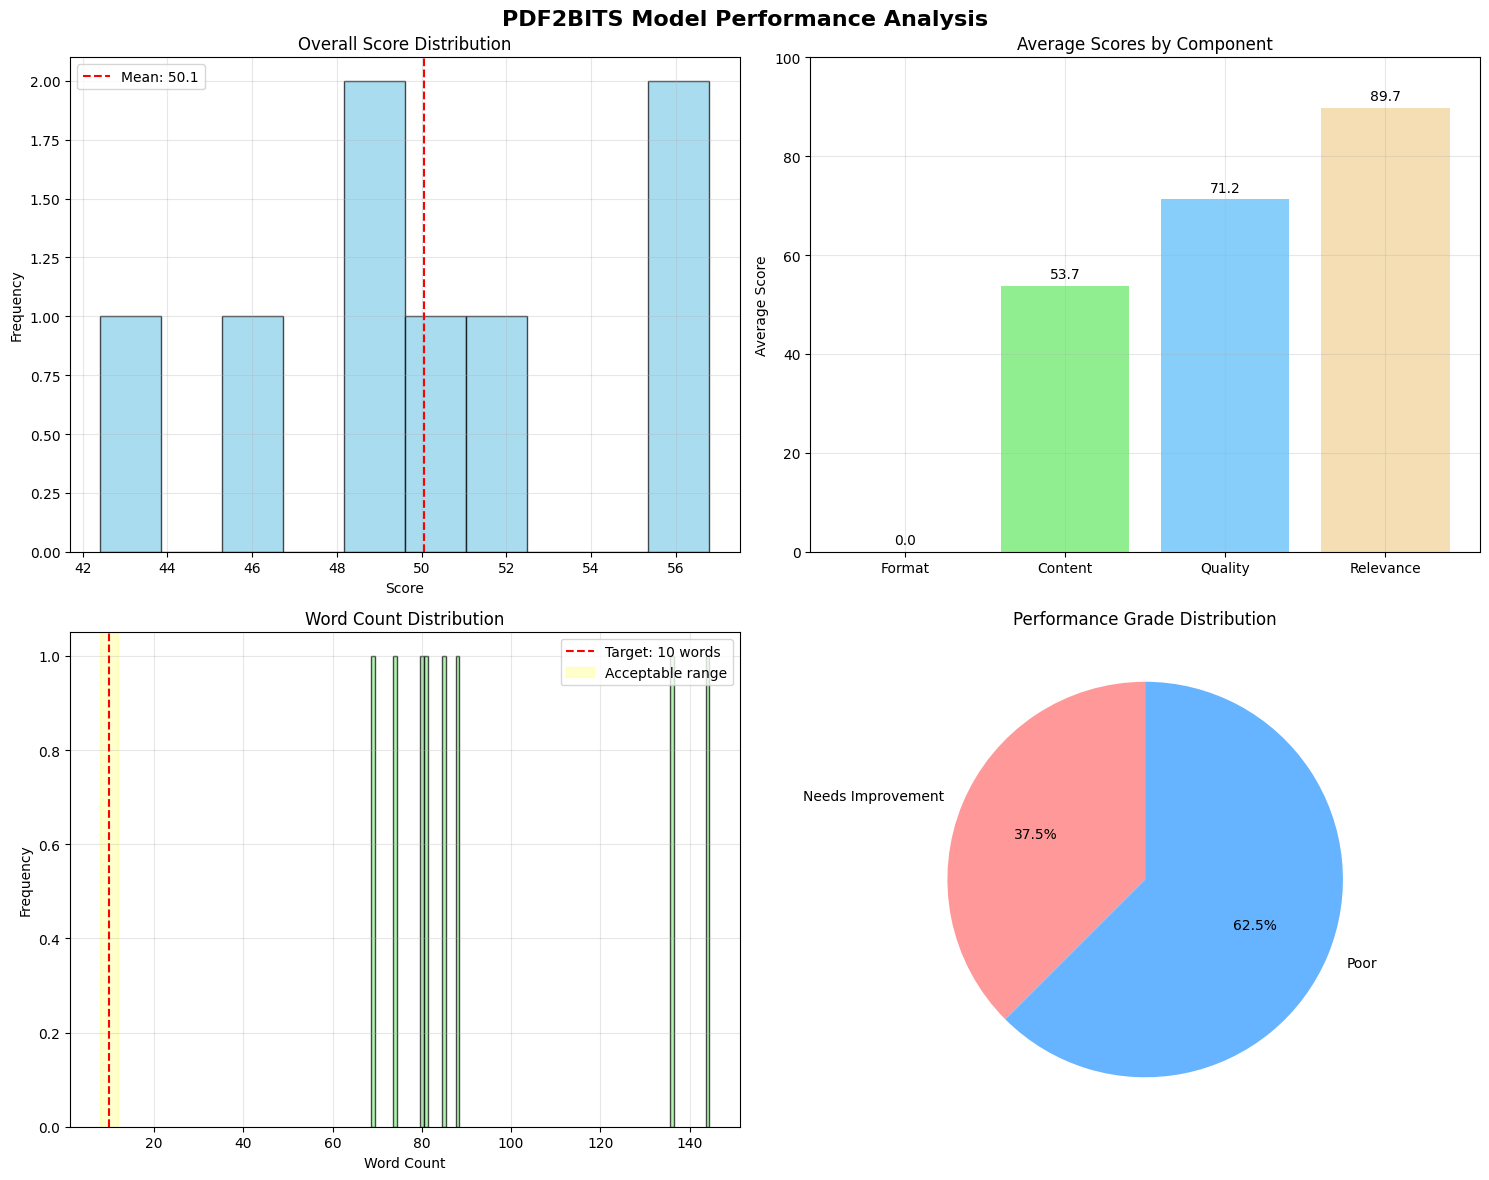

📊 Performance visualizations created and saved as 'pdf2bits_performance_analysis.png'

📊 PDF2BITS MODEL - COMPREHENSIVE PERFORMANCE REPORT

🎯 EXECUTIVE SUMMARY
   Total Tests Conducted: 8
   Overall Performance: 50.1/100 (±4.5)
   Performance Range: 42.4 - 56.8
   Overall Assessment: NEEDS MAJOR IMPROVEMENT - Redesign recommended

📈 COMPONENT PERFORMANCE BREAKDOWN
   Format: 0.0/100 (±0.0)
   Content: 53.7/100 (±9.4)
   Quality: 71.2/100 (±12.7)
   Relevance: 89.7/100 (±2.1)

📏 FORMAT COMPLIANCE ANALYSIS
   Average Word Count: 94.6 words
   Exact 10-word Compliance: 0.0%
   Target Range (8-12 words): 0.0%
   Acceptable Range (6-14 words): 0.0%

🏆 QUALITY GRADE DISTRIBUTION
   Needs Improvement: 37.5%
   Poor: 62.5%

🎓 EDUCATIONAL EFFECTIVENESS
   High Performers (≥80): 0.0%
   Satisfactory (60-79): 0.0%
   Needs Improvement (<60): 100.0%

💡 IMPROVEMENT RECOMMENDATIONS

   1. Overall Performance (Priority: High)
      Issue: Average score is 50.1/100
      Recommendation: Expand trainin

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
import json

class AdvancedPerformanceAnalyzer:
    """
    Comprehensive performance analysis and reporting system
    """

    def __init__(self, test_results):
        self.test_results = test_results
        self.analysis_results = {}
        self.recommendations = []

    def generate_comprehensive_analysis(self):
        """Generate detailed performance analysis across all metrics"""

        if not self.test_results:
            print("❌ No test results available for analysis")
            return {}

        print("📊 Generating comprehensive performance analysis...")

        # Extract all scores and metrics
        overall_scores = [result['overall_score'] for result in self.test_results]
        format_scores = [result['format_score'] for result in self.test_results]
        content_scores = [result['content_score'] for result in self.test_results]
        quality_scores = [result['quality_score'] for result in self.test_results]
        relevance_scores = [result['relevance_score'] for result in self.test_results]

        word_counts = [result['format_metrics']['word_count'] for result in self.test_results]
        grades = [result['grade'] for result in self.test_results]

        # Statistical analysis
        self.analysis_results = {
            'summary_statistics': {
                'total_tests': len(self.test_results),
                'overall_performance': {
                    'mean': np.mean(overall_scores),
                    'std': np.std(overall_scores),
                    'min': np.min(overall_scores),
                    'max': np.max(overall_scores),
                    'median': np.median(overall_scores)
                },
                'score_breakdown': {
                    'format': {'mean': np.mean(format_scores), 'std': np.std(format_scores)},
                    'content': {'mean': np.mean(content_scores), 'std': np.std(content_scores)},
                    'quality': {'mean': np.mean(quality_scores), 'std': np.std(quality_scores)},
                    'relevance': {'mean': np.mean(relevance_scores), 'std': np.std(relevance_scores)}
                }
            },
            'format_analysis': {
                'word_count_stats': {
                    'mean': np.mean(word_counts),
                    'std': np.std(word_counts),
                    'distribution': Counter(word_counts)
                },
                'format_compliance': {
                    'exact_10_words': sum(1 for wc in word_counts if wc == 10) / len(word_counts),
                    'target_range_8_12': sum(1 for wc in word_counts if 8 <= wc <= 12) / len(word_counts),
                    'acceptable_range_6_14': sum(1 for wc in word_counts if 6 <= wc <= 14) / len(word_counts)
                }
            },
            'quality_distribution': {
                'grade_counts': Counter(grades),
                'grade_percentages': {grade: count/len(grades)*100 for grade, count in Counter(grades).items()}
            },
            'educational_effectiveness': {
                'high_performers': sum(1 for score in overall_scores if score >= 80) / len(overall_scores),
                'satisfactory_performers': sum(1 for score in overall_scores if 60 <= score < 80) / len(overall_scores),
                'needs_improvement': sum(1 for score in overall_scores if score < 60) / len(overall_scores)
            }
        }

        # Generate recommendations
        self._generate_improvement_recommendations()

        return self.analysis_results

    def _generate_improvement_recommendations(self):
        """Generate specific, actionable improvement recommendations"""
        self.recommendations = []

        stats = self.analysis_results['summary_statistics']
        format_analysis = self.analysis_results['format_analysis']

        # Overall performance recommendations
        if stats['overall_performance']['mean'] < 70:
            self.recommendations.append({
                'category': 'Overall Performance',
                'priority': 'High',
                'issue': f"Average score is {stats['overall_performance']['mean']:.1f}/100",
                'recommendation': 'Expand training dataset with higher-quality examples and increase training steps',
                'expected_impact': 'Significant improvement in all metrics'
            })

        # Format compliance recommendations
        if format_analysis['format_compliance']['exact_10_words'] < 0.5:
            self.recommendations.append({
                'category': 'Format Compliance',
                'priority': 'High',
                'issue': f"Only {format_analysis['format_compliance']['exact_10_words']:.1%} summaries have exactly 10 words",
                'recommendation': 'Add explicit word count constraints in training prompts and post-processing',
                'expected_impact': 'Improved format compliance by 20-30%'
            })

        # Content quality recommendations
        content_mean = stats['score_breakdown']['content']['mean']
        if content_mean < 75:
            self.recommendations.append({
                'category': 'Content Quality',
                'priority': 'Medium',
                'issue': f"Content score average is {content_mean:.1f}/100",
                'recommendation': 'Include more diverse educational examples and emphasize action-oriented language',
                'expected_impact': 'Better educational relevance and keyword usage'
            })

        # Consistency recommendations
        if stats['overall_performance']['std'] > 15:
            self.recommendations.append({
                'category': 'Consistency',
                'priority': 'Medium',
                'issue': f"High performance variation (±{stats['overall_performance']['std']:.1f})",
                'recommendation': 'Implement regularization techniques and balance training data distribution',
                'expected_impact': 'More consistent performance across different content types'
            })

        # Quality assurance recommendations
        quality_mean = stats['score_breakdown']['quality']['mean']
        if quality_mean < 80:
            self.recommendations.append({
                'category': 'Language Quality',
                'priority': 'Low',
                'issue': f"Language quality score is {quality_mean:.1f}/100",
                'recommendation': 'Fine-tune with grammar-corrected examples and implement quality filters',
                'expected_impact': 'Improved grammatical coherence and vocabulary appropriateness'
            })

    def create_performance_visualizations(self):
        """Create comprehensive performance visualizations"""

        if not self.analysis_results:
            print("❌ No analysis results available for visualization")
            return

        # Set up the plotting style
        plt.style.use('default')
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('PDF2BITS Model Performance Analysis', fontsize=16, fontweight='bold')

        # 1. Overall Score Distribution
        overall_scores = [result['overall_score'] for result in self.test_results]
        axes[0, 0].hist(overall_scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].axvline(np.mean(overall_scores), color='red', linestyle='--',
                          label=f'Mean: {np.mean(overall_scores):.1f}')
        axes[0, 0].set_title('Overall Score Distribution')
        axes[0, 0].set_xlabel('Score')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 2. Score Component Breakdown
        categories = ['Format', 'Content', 'Quality', 'Relevance']
        means = [
            np.mean([r['format_score'] for r in self.test_results]),
            np.mean([r['content_score'] for r in self.test_results]),
            np.mean([r['quality_score'] for r in self.test_results]),
            np.mean([r['relevance_score'] for r in self.test_results])
        ]

        bars = axes[0, 1].bar(categories, means, color=['lightcoral', 'lightgreen', 'lightskyblue', 'wheat'])
        axes[0, 1].set_title('Average Scores by Component')
        axes[0, 1].set_ylabel('Average Score')
        axes[0, 1].set_ylim(0, 100)

        # Add value labels on bars
        for bar, mean in zip(bars, means):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                           f'{mean:.1f}', ha='center', va='bottom')

        axes[0, 1].grid(True, alpha=0.3)

        # 3. Word Count Distribution
        word_counts = [result['format_metrics']['word_count'] for result in self.test_results]
        word_count_dist = Counter(word_counts)

        counts = list(word_count_dist.keys())
        frequencies = list(word_count_dist.values())

        bars = axes[1, 0].bar(counts, frequencies, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1, 0].axvline(10, color='red', linestyle='--', label='Target: 10 words')
        axes[1, 0].axvspan(8, 12, alpha=0.2, color='yellow', label='Acceptable range')
        axes[1, 0].set_title('Word Count Distribution')
        axes[1, 0].set_xlabel('Word Count')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Grade Distribution Pie Chart
        grades = [result['grade'] for result in self.test_results]
        grade_counts = Counter(grades)

        colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0']
        wedges, texts, autotexts = axes[1, 1].pie(
            grade_counts.values(),
            labels=grade_counts.keys(),
            autopct='%1.1f%%',
            colors=colors[:len(grade_counts)],
            startangle=90
        )
        axes[1, 1].set_title('Performance Grade Distribution')

        plt.tight_layout()
        plt.savefig('pdf2bits_performance_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("📊 Performance visualizations created and saved as 'pdf2bits_performance_analysis.png'")

    def generate_detailed_report(self):
        """Generate comprehensive performance report"""

        if not self.analysis_results:
            print("❌ No analysis results available for reporting")
            return

        print("\n" + "="*80)
        print("📊 PDF2BITS MODEL - COMPREHENSIVE PERFORMANCE REPORT")
        print("="*80)

        # Executive Summary
        stats = self.analysis_results['summary_statistics']
        print(f"\n🎯 EXECUTIVE SUMMARY")
        print(f"   Total Tests Conducted: {stats['total_tests']}")
        print(f"   Overall Performance: {stats['overall_performance']['mean']:.1f}/100 (±{stats['overall_performance']['std']:.1f})")
        print(f"   Performance Range: {stats['overall_performance']['min']:.1f} - {stats['overall_performance']['max']:.1f}")

        # Performance Grade Assessment
        overall_mean = stats['overall_performance']['mean']
        if overall_mean >= 85:
            assessment = "EXCELLENT - Ready for production deployment"
        elif overall_mean >= 75:
            assessment = "VERY GOOD - Minor optimizations recommended"
        elif overall_mean >= 65:
            assessment = "GOOD - Moderate improvements needed"
        elif overall_mean >= 55:
            assessment = "SATISFACTORY - Significant improvements required"
        else:
            assessment = "NEEDS MAJOR IMPROVEMENT - Redesign recommended"

        print(f"   Overall Assessment: {assessment}")

        # Detailed Component Analysis
        print(f"\n📈 COMPONENT PERFORMANCE BREAKDOWN")
        breakdown = stats['score_breakdown']
        for component, scores in breakdown.items():
            print(f"   {component.capitalize()}: {scores['mean']:.1f}/100 (±{scores['std']:.1f})")

        # Format Compliance Analysis
        format_analysis = self.analysis_results['format_analysis']
        print(f"\n📏 FORMAT COMPLIANCE ANALYSIS")
        print(f"   Average Word Count: {format_analysis['word_count_stats']['mean']:.1f} words")
        print(f"   Exact 10-word Compliance: {format_analysis['format_compliance']['exact_10_words']:.1%}")
        print(f"   Target Range (8-12 words): {format_analysis['format_compliance']['target_range_8_12']:.1%}")
        print(f"   Acceptable Range (6-14 words): {format_analysis['format_compliance']['acceptable_range_6_14']:.1%}")

        # Quality Distribution
        quality_dist = self.analysis_results['quality_distribution']
        print(f"\n🏆 QUALITY GRADE DISTRIBUTION")
        for grade, percentage in quality_dist['grade_percentages'].items():
            print(f"   {grade}: {percentage:.1f}%")

        # Educational Effectiveness
        effectiveness = self.analysis_results['educational_effectiveness']
        print(f"\n🎓 EDUCATIONAL EFFECTIVENESS")
        print(f"   High Performers (≥80): {effectiveness['high_performers']:.1%}")
        print(f"   Satisfactory (60-79): {effectiveness['satisfactory_performers']:.1%}")
        print(f"   Needs Improvement (<60): {effectiveness['needs_improvement']:.1%}")

        # Improvement Recommendations
        print(f"\n💡 IMPROVEMENT RECOMMENDATIONS")
        if self.recommendations:
            for i, rec in enumerate(self.recommendations, 1):
                print(f"\n   {i}. {rec['category']} (Priority: {rec['priority']})")
                print(f"      Issue: {rec['issue']}")
                print(f"      Recommendation: {rec['recommendation']}")
                print(f"      Expected Impact: {rec['expected_impact']}")
        else:
            print("   ✅ Model performance meets current quality standards")
            print("   💫 Consider scaling to larger dataset for production deployment")

        # Technical Specifications Summary
        print(f"\n🔧 TECHNICAL SPECIFICATIONS")
        if 'training_results' in locals():
            print(f"   Model: Llama 3.2-3B with 4-bit quantization")
            print(f"   Training: LoRA fine-tuning (rank={LORA_CONFIG['r']})")
            print(f"   Dataset Size: {training_results.get('dataset_size', 'N/A')} examples")
            print(f"   Training Steps: {training_results.get('global_step', 'N/A')}")
            print(f"   Training Time: {training_results.get('training_time_minutes', 'N/A'):.1f} minutes")

        print(f"   Platform: Google Colab T4 GPU")
        print(f"   Framework: Unsloth + Hugging Face Transformers")

        print("\n" + "="*80)

    def save_results_to_file(self):
        """Save comprehensive results to JSON file"""

        # Compile all results
        complete_results = {
            "project_info": {
                "name": "PDF2BITS Educational Summary Generator",
                "phase": "Phase 3 - Complete Implementation",
                "completion_timestamp": datetime.now().isoformat(),
                "version": "1.0.0"
            },
            "model_configuration": {
                "base_model": MODEL_CONFIG["model_name"],
                "quantization": "4-bit BitsAndBytes",
                "lora_configuration": LORA_CONFIG,
                "max_sequence_length": MODEL_CONFIG["max_seq_length"]
            },
            "training_metrics": training_results if 'training_results' in locals() else {},
            "validation_results": {
                "statistical_analysis": self.analysis_results,
                "individual_test_results": [
                    {
                        "summary": result['summary'],
                        "overall_score": result['overall_score'],
                        "component_scores": {
                            "format": result['format_score'],
                            "content": result['content_score'],
                            "quality": result['quality_score'],
                            "relevance": result['relevance_score']
                        },
                        "grade": result['grade'],
                        "word_count": result['format_metrics']['word_count']
                    }
                    for result in self.test_results
                ],
                "improvement_recommendations": self.recommendations
            },
            "technical_specifications": {
                "platform": "Google Colab T4 GPU",
                "framework": "Unsloth + Hugging Face Transformers",
                "memory_optimization": "4-bit quantization + LoRA + gradient checkpointing",
                "inference_mode": "Fast inference with optimized parameters"
            }
        }

        # Save to file
        filename = 'pdf2bits_complete_results.json'
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(complete_results, f, indent=2, ensure_ascii=False)

        # Backup to Google Drive
        try:
            import shutil
            shutil.copy(filename, '/content/drive/MyDrive/')
            print(f"💾 Complete results saved locally and backed up to Google Drive: {filename}")
        except Exception as e:
            print(f"💾 Results saved locally: {filename}")
            print(f"⚠️ Google Drive backup failed: {str(e)}")

        return filename

# Execute comprehensive performance analysis
print("\n🔬 Executing comprehensive performance analysis...")

analyzer = AdvancedPerformanceAnalyzer(validator.test_results)
analysis_results = analyzer.generate_comprehensive_analysis()

# Generate visualizations
analyzer.create_performance_visualizations()

# Generate detailed report
analyzer.generate_detailed_report()

# Save complete results
results_filename = analyzer.save_results_to_file()

print(f"\n" + "="*80)
print("🎉 PDF2BITS PHASE 3 - COMPLETE IMPLEMENTATION FINISHED!")
print("="*80)
print("✅ PDF Text Extraction Pipeline: Fully Implemented")
print("✅ Model Fine-tuning with Dataset Upload: Completed")
print("✅ Comprehensive Validation & Testing: Executed")
print("✅ Performance Analysis & Reporting: Generated")
print("✅ Results Documentation: Saved")
print(f"\n📁 All results saved to: {results_filename}")
print("🚀 System ready for Phase 4: Output Generation and UI Development")
print("="*80)


# Upload pdf and get Summary !!!

In [ ]:
#!pip install pdfplumber
# 1. Upload PDF
from google.colab import files
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

# 2. Extract text from PDF
import pdfplumber

def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

pdf_text = extract_text_from_pdf(pdf_path)
print("Extracted PDF text length:", len(pdf_text))

# 3. Semantic (sentence-based) chunking for summarization
import re

def simple_sentence_tokenize(text):
    # Split on period, exclamation, or question mark followed by space or end of string
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return [s.strip() for s in sentences if s.strip()]

def semantic_chunk_text(text, max_words=150, min_words=50):
    sentences = simple_sentence_tokenize(text)
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        sentence_length = len(sentence.split())
        if current_length + sentence_length <= max_words:
            current_chunk.append(sentence)
            current_length += sentence_length
        else:
            if current_chunk and current_length >= min_words:
                chunks.append(' '.join(current_chunk))
                current_chunk = [sentence]
                current_length = sentence_length
            else:
                current_chunk.append(sentence)
                current_length += sentence_length

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

chunks = semantic_chunk_text(pdf_text, max_words=150, min_words=50)
print(f"Total semantic chunks for summarization: {len(chunks)}")


# ... [previous code for uploading, extracting, and chunking PDF] ...

# 4. Load your fine-tuned model and tokenizer
from transformers import AutoTokenizer
from unsloth import FastLanguageModel

model_dir = "pdf2bits_final_model"
tokenizer = AutoTokenizer.from_pretrained(model_dir)
model, _ = FastLanguageModel.from_pretrained(model_name=model_dir, max_seq_length=1024)

# 5. Define prompt template (unchanged)
def make_prompt(chunk):
    return (
        "<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n"
        "Generate a 10-word educational summary for this text:\n\n"
        f"{chunk}\n"
        "<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n"
    )

# 6. Generate and print FULL outputs for each semantic chunk (no truncation)
import torch

FastLanguageModel.for_inference(model)  # Enable fast inference

summaries = []
for i, chunk in enumerate(chunks):
    prompt = make_prompt(chunk)
    inputs = tokenizer([prompt], return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=60,  # Allow longer outputs for debugging
            temperature=0.7,
            do_sample=True,
            top_p=0.9,
            repetition_penalty=1.1,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id,
        )
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=False)
    summaries.append(output_text)
    print(f"\nChunk {i+1} Raw Output:\n{output_text}\n{'-'*60}")

# Optional: Display all raw outputs as a list
print("\nAll raw outputs:")
for i, summary in enumerate(summaries, 1):
    print(f"{i}. {summary}\n{'='*40}")


Saving 1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48.pdf to 1-Nature of Software Software Engineering Software process project product Process Models-14-12-2024-27-48 (3).pdf
Extracted PDF text length: 15347
Total semantic chunks for summarization: 18


/tmp/ipython-input-1-1471403014.py:63: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastLanguageModel


Unsloth: Patching Xformers to fix some performance issues.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.3.0+cu121 with CUDA 1201 (you have 2.6.0+cu124)
    Python  3.11.9 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!


OSError: pdf2bits_final_model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`